# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane treatments data is a more accurate estimate of the population mean than the other treatments data.

- For mouse l509, who was treated with Capomulin, it is possible to note a considerable drop in tumor volume after 20 days of treatment.

- Mouse weight and tumor volume have a strong correlation within the Capomulin Regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = mouse_data["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = mouse_data[mouse_data.duplicated(["Mouse ID", "Timepoint"])]
unique_duplicated = duplicated["Mouse ID"].unique()
unique_duplicated

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated = []

for i in range(len(unique_duplicated)):
    duplicated.append(mouse_data.loc[mouse_data["Mouse ID"] == unique_duplicated[i]])

duplicated = pd.concat(duplicated)
duplicated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicated_index = duplicated.index.tolist()
clean_df = mouse_data.drop(duplicated_index)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df_count = clean_df["Mouse ID"].nunique()
clean_df_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of
# each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_tvmean = pd.DataFrame(clean_df.groupby(["Drug Regimen"]).mean()\
                                   ["Tumor Volume (mm3)"])
drug_regimen_tvmedian = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_regimen_tvmvariance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_regimen_tvstddev = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_regimen_tvmsem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.

drug_regimen = drug_regimen_tvmean
drug_regimen = drug_regimen.rename(columns = {'Tumor Volume (mm3)':'Mean Tumor Volume'})
drug_regimen['Median Tumor Volume'] = drug_regimen_tvmedian
drug_regimen['Tumor Volume Variance'] = drug_regimen_tvmvariance
drug_regimen['Tumor Volume Std. Dev.'] = drug_regimen_tvstddev
drug_regimen['Tumor Volume Std. Err.'] = drug_regimen_tvmsem

drug_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

drug_regimen_agg = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':\
                   ['mean', 'median', 'var', 'std', 'sem']})
drug_regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

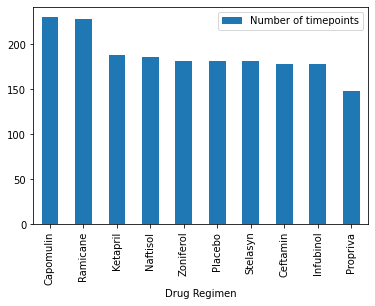

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each 
# drug regimen using Pandas.

mice_tested = pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count()['Mouse ID'])
mice_tested = mice_tested.rename(columns = {'Mouse ID':'Number of timepoints'})
mice_tested = mice_tested.sort_values(['Number of timepoints'], ascending = False)
mice_tested.plot(kind = 'bar')

plt.show()

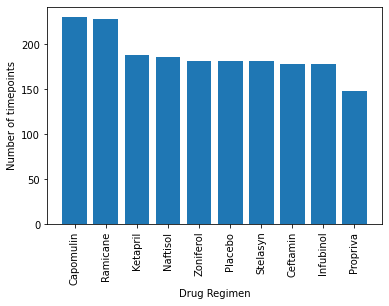

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each 
# drug regimen using pyplot.
y_axis = mice_tested['Number of timepoints']
x_axis = mice_tested.index

plt.bar(x_axis, y_axis, align = 'center')
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.ylabel('Number of timepoints')

plt.show()

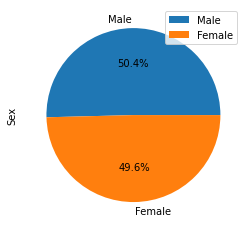

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

count_sex = pd.DataFrame(clean_df.groupby(["Sex"]).nunique()['Mouse ID'])
count_sex = count_sex.rename_axis('Index')
count_sex = count_sex.rename(columns = {'Mouse ID':'Sex'})
count_sex = count_sex.sort_values(['Sex'], ascending = False)

count_sex.plot(kind = 'pie', autopct = '%1.1f%%', subplots = True)

plt.show()

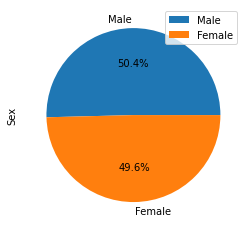

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = count_sex.index
sex_count = count_sex['Sex']

plt.pie(sex_count, labels = sex, autopct = "%1.1f%%")
plt.legend()
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_df = pd.DataFrame(clean_df.groupby(['Mouse ID']).max()['Timepoint'])

# Merge this group df with the original DataFrame to get the tumor volume at the last
# timepoint
m_group_df = pd.merge(group_df, clean_df, how = 'left', on = ['Mouse ID', 'Timepoint'])
m_group_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_cap = []
tumor_volume_ram = []
tumor_volume_inf = []
tumor_volume_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in m_group_df.iterrows():
    if row['Drug Regimen'] == treatments [0]:
        tumor_volume_cap.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treatments [1]:
        tumor_volume_ram.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treatments [2]:
        tumor_volume_inf.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treatments [3]:
        tumor_volume_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
tumor_volumes = pd.DataFrame({
    treatments[0]: tumor_volume_cap,
    treatments[1]: tumor_volume_ram,
    treatments[2]: tumor_volume_inf,
    treatments[3]: tumor_volume_cef,
})
    
    # Determine outliers using upper and lower bounds
    # Capomulin
quartiles_0 = tumor_volumes['Capomulin'].quantile([.25, .5, .75])
lowerq_0 = quartiles_0[0.25]
upperq_0 = quartiles_0[0.75]
iqr_0 = upperq_0 - lowerq_0
lower_bound_0 = lowerq_0 - (1.5*iqr_0)
upper_bound_0 = upperq_0 + (1.5*iqr_0)

outliers_0 = []

for volume in tumor_volume_cap:
    if volume < lower_bound_0 or volume > upper_bound_0:
        outliers_0.append(volume)

print(f"Capomulin's outliers: " + str(outliers_0))
    
        # Ramicane
quartiles_1 = tumor_volumes['Ramicane'].quantile([.25, .5, .75])
lowerq_1 = quartiles_1[0.25]
upperq_1 = quartiles_1[0.75]
iqr_1 = upperq_1 - lowerq_1
lower_bound_1 = lowerq_1 - (1.5*iqr_1)
upper_bound_1 = upperq_1 + (1.5*iqr_1)

outliers_1 = []

for volume in tumor_volume_ram:
    if volume < lower_bound_1 or volume > upper_bound_1:
        outliers_1.append(volume)

print(f"Ramicane's outliers: " + str(outliers_1))

    # Infubinol
quartiles_2 = tumor_volumes['Infubinol'].quantile([.25, .5, .75])
lowerq_2 = quartiles_2[0.25]
upperq_2 = quartiles_2[0.75]
iqr_2 = upperq_2 - lowerq_2
lower_bound_2 = lowerq_2 - (1.5*iqr_2)
upper_bound_2 = upperq_2 + (1.5*iqr_2)

outliers_2 = []

for volume in tumor_volume_inf:
    if volume < lower_bound_2 or volume > upper_bound_2:
        outliers_2.append(volume)

print(f"Infubinol's outliers: " + str(outliers_2))

    # Ceftamin
quartiles_3 = tumor_volumes['Ceftamin'].quantile([.25, .5, .75])
lowerq_3 = quartiles_3[0.25]
upperq_3 = quartiles_3[0.75]
iqr_3 = upperq_3 - lowerq_3
lower_bound_3 = lowerq_3 - (1.5*iqr_3)
upper_bound_3 = upperq_3 + (1.5*iqr_3)

outliers_3 = []

for volume in tumor_volume_cef:
    if volume < lower_bound_3 or volume > upper_bound_3:
        outliers_3.append(volume)

print(f"Ceftamin's outliers: " + str(outliers_3))


Capomulin's outliers: []
Ramicane's outliers: []
Infubinol's outliers: [36.321345799999996]
Ceftamin's outliers: []


/Users/mat.arruda/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


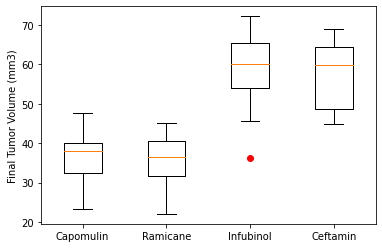

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment
# group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(treatments)
ax1.boxplot(tumor_volumes, 0 , 'red')
plt.show()


## Line and Scatter Plots

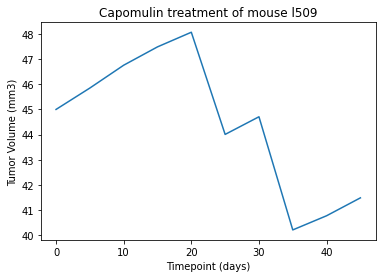

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_l509 = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 'l509')]

capomulin_line_plot = plt.plot(capomulin_l509['Timepoint'], capomulin_l509['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

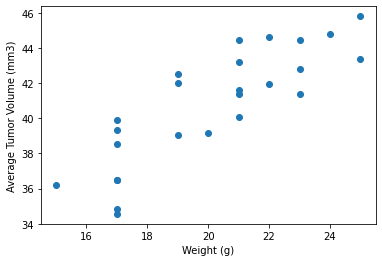

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_volume = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin')]
avg_volume = avg_volume.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']

weight = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin')]
weight = weight.groupby(['Mouse ID']).mean()['Weight (g)']

plt.scatter(weight, avg_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


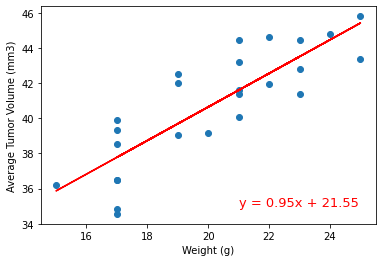

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, avg_volume)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.')

x_values = weight
y_values = avg_volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope, 2)) + 'x + '+ str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (21,35), fontsize = 13, color = 'red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
